In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
employee_df = pd.read_csv("/content/sample_data/data_employee.csv")
training_df = pd.read_csv("/content/sample_data/training_employee.csv")


In [4]:
employee_df.head()

,EmpID,FirstName,LastName,BusinessUnit,EmployeeStatus
0,3427,Uriah,Bridges,CCDR,Active
1,3428,Paula,Small,EW,Active
2,3429,Edward,Buck,PL,Active
3,3430,Michael,Riordan,CCDR,Active
4,3431,Jasmine,Onque,TNS,Active


In [5]:
training_df.head()

,EmpID,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days)
0,1001,21-Sep-22,Customer Service,Internal,Failed,4
1,1002,19-Jul-23,Leadership Development,Internal,Failed,2
2,1003,24-Feb-23,Technical Skills,Internal,Incomplete,4
3,1004,12-Jan-23,Customer Service,Internal,Completed,2
4,1005,12-May-23,Communication Skills,External,Passed,4


In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmpID           3000 non-null   int64 
 1   FirstName       3000 non-null   object
 2   LastName        3000 non-null   object
 3   BusinessUnit    3000 non-null   object
 4   EmployeeStatus  3000 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.3+ KB


In [7]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmpID                    3000 non-null   int64 
 1   Training Date            3000 non-null   object
 2   Training Program Name    3000 non-null   object
 3   Training Type            3000 non-null   object
 4   Training Outcome         3000 non-null   object
 5   Training Duration(Days)  3000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 140.8+ KB


In [8]:
# Filter karyawan aktif
active_employee = employee_df[
    employee_df["EmployeeStatus"] == "Active"
]


In [9]:
# Standarisasi kolom ID
training_df = training_df.rename(columns={
    "Employee ID": "EmpID"
})


In [10]:
# Merge employee + training
training_clean = training_df.merge(
    active_employee[["EmpID", "BusinessUnit"]],
    on="EmpID",
    how="inner"
)


In [11]:
# Standarisasi data teks
training_clean["Training Type"] = (
    training_clean["Training Type"]
    .str.lower()
    .str.strip()
)


In [12]:
# Validasi outcome training
valid_outcome = ["Completed", "Partial Completion", "Not Completed"]


In [13]:
# Filter data training berdasarkan outcome yang valid
training_clean = training_clean[
    training_clean["Training Outcome"].isin(valid_outcome)
]


In [14]:
# Pilih kolom LMS-only
lms_upload = training_clean[[
    "EmpID",
    "Training Program Name",
    "Training Type",
    "Training Date",
    "Training Duration(Days)",
    "Training Outcome"
]]


In [15]:
print("Employee raw:", employee_df.shape)
print("Active employee:", active_employee.shape)
print("Training raw:", training_df.shape)
print("Training after cleaning:", training_clean.shape)
print("Final LMS upload:", lms_upload.shape)


Employee raw: (3000, 5)
Active employee: (2458, 5)
Training raw: (3000, 6)
Training after cleaning: (650, 7)
Final LMS upload: (650, 6)


In [16]:
lms_upload.to_csv("lms_migration_ready.csv", index=False)

from google.colab import files
files.download("lms_migration_ready.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
before_cleaning = training_df.shape[0]
after_cleaning = lms_upload.shape[0]

before_cleaning, after_cleaning


(3000, 650)

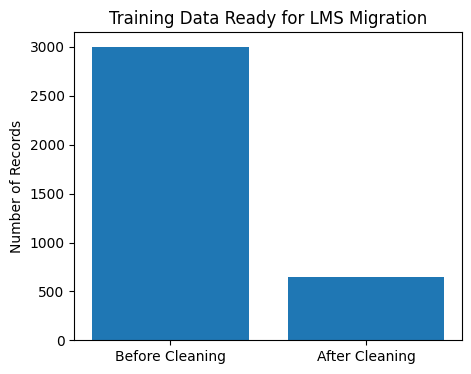

In [18]:
labels = ["Before Cleaning", "After Cleaning"]
values = [before_cleaning, after_cleaning]

plt.figure(figsize=(5,4))
plt.bar(labels, values)
plt.title("Training Data Ready for LMS Migration")
plt.ylabel("Number of Records")
plt.show()


In [19]:
training_type_count = (
    lms_upload["Training Type"]
    .value_counts()
)

training_type_count


,count
Training Type,
internal,346
external,304


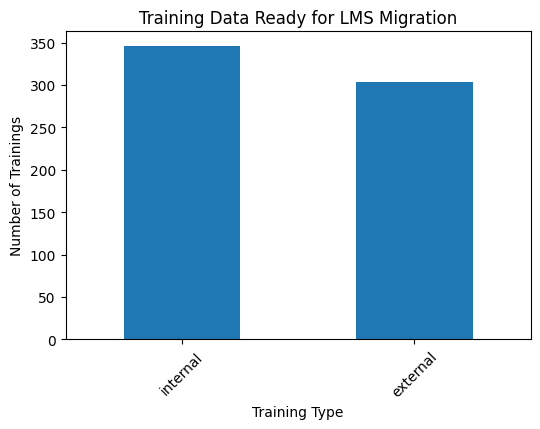

In [20]:
plt.figure(figsize=(6,4))
training_type_count.plot(kind="bar")
plt.title("Training Data Ready for LMS Migration")
plt.ylabel("Number of Trainings")
plt.xlabel("Training Type")
plt.xticks(rotation=45)
plt.show()
